In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image
from PIL import ImageFilter
%matplotlib inline

/usr/lib/python2.7/dist-packages/pkg_resources/__init__.py:1224: UserWarning: /home/brendan/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
  warnings.warn(msg, UserWarning)


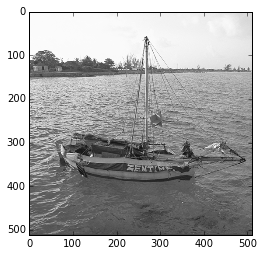

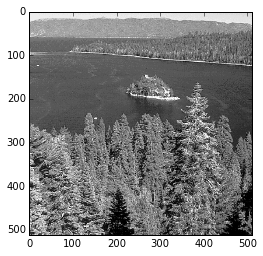

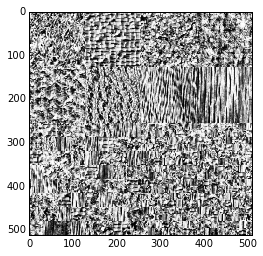

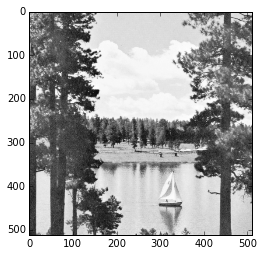

In [13]:
close_boat=np.asarray(Image.open("Images/Q3/81.pgm"),dtype=np.float64)/255.0
island=np.asarray(Image.open("Images/Q3/15.pgm"),dtype=np.float64)/255.0
texture=np.asarray(Image.open("Images/Q3/171.pgm"),dtype=np.float64)/255.0
far_boat=np.asarray(Image.open("Images/Q3/45.pgm"),dtype=np.float64)/255.0

plt.figure()
plt.imshow(close_boat, cmap="Greys_r")
plt.figure()
plt.imshow(island, cmap="Greys_r")
plt.figure()
plt.imshow(texture, cmap="Greys_r")
plt.figure()
plt.imshow(far_boat, cmap="Greys_r")